<h1>Analisis univariado Nulos y atipicos</h1>
<p>Proyecto aplicado - Rescindidos Funeraria La Aurora</´p>
<p>Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>

<h3> Carga de datos más librerías </h3>

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import re
import requests


In [53]:
data= pd.read_csv("../data/outputs/principal_v0.3.csv")
data.head(2)


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,Localidad,Longitud,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,0,-74.668116,5.454237,NaN,NaN,NaN,NaN,0.662207,0.304082,0.033711
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,0,-74.674757,5.479989,NaN,NaN,NaN,NaN,0.421943,0.563205,0.014852


Para el presente análisis transformamos nuestra variable objetivo como 0 para usuario inactivos o 1 para usuarios activos, adicionalmente separamos el motivo en una variable adicional

In [54]:
data["motivo"] = data["EstadoActual"].str.split(pat="-", expand=True, n=1)[1]
data["estado"] = data["EstadoActual"].str.split(pat="-", expand=True, n=1)[0]
data["estado"].where(data["estado"] == "Inactivo ", 1, inplace=True)
data["estado"].where(data["estado"] != "Inactivo ", 0, inplace=True)
data["estado"] = data["estado"].astype(int)
data["estado"].head()


0    0
1    0
2    0
3    1
4    0
Name: estado, dtype: int64

<h3> Estadisticas generales </h3>

<h4>Descripción dataset </h4>

In [55]:
vars_numb = data.describe().columns
data[vars_numb].describe().T


,count,mean,std,min,25%,50%,75%,max
CodigoPrograma,9380.0,69655.781343,53389.496557,56.000000,24124.500000,53186.500000,127496.750000,1.740390e+05
edad,9380.0,47.544456,13.599783,18.000000,37.000000,47.000000,57.000000,1.010000e+02
#_inscritos_activos,9380.0,3.817058,2.636811,0.000000,1.000000,5.000000,6.000000,1.400000e+01
#_mascotas_activas,9380.0,0.234648,0.568436,0.000000,0.000000,0.000000,0.000000,6.000000e+00
valorCuota_1,9380.0,26820.092492,91873.911378,0.000000,15100.000000,18100.000000,22000.000000,4.500000e+06
valorUltimaCuota,9380.0,28521.563674,92206.446270,0.000000,16100.000000,19500.000000,24600.000000,4.500000e+06
qinactivos,9380.0,1.779211,0.824494,1.000000,1.000000,2.000000,2.000000,6.000000e+00
qactivos,9380.0,2.256290,0.857590,1.000000,1.000000,3.000000,3.000000,5.000000e+00
recauExitoso,9380.0,12.636674,10.643051,1.000000,5.000000,10.000000,16.000000,8.400000e+01
recauFallido,9380.0,11.498401,12.574787,1.000000,3.000000,7.000000,15.000000,1.270000e+02


Tenemos 9380 registros, pero de los 9380, solo 3868 tienen datos importantes como el nivel socio economico o solo 5869 datos como longitud y latitud

In [56]:
variables_categoricas = data.drop(vars_numb, axis=1).columns
data[variables_categoricas].describe().T


,count,unique,top,freq
fechaSolicitud,9380,3187,2020-02-29,48
tomador,9380,8318,Fabiola Salazar Jaramillo,20
fechaNacimiento,9380,6710,1956-01-24,20
TipoPrograma,9380,1,Familiar,9380
EstadoActual,9380,46,Activo - Activo,2600
FechaRescindido,9380,1758,9999-12-31 00:00:00.000,2930
fechaIdealPago_CuotaCancelada,9380,1891,2023-02-01,90
fechaactivoi,9380,3196,2020-02-29,48
motivoactivoi,9380,4,Creacion de Solicitud,8968
fechainactivof,9380,1020,2021-12-31,77


En nuestras variables categorícas, empiezan a aparecer datos que posiblemente no aporten valor a la clasificación, en este caso eliminamos estas columnas que no aportan valor. El primer caso es estado actual, el cual lo dividimos anteriormente, el segundo es tipo de programa donde solo tomamos familiares, también observamos que fechas como inactivo - activo estan teniendo diferencias de 0 días o que los motivos en 5000 datos son iguales Activo.

In [57]:
data.drop(["EstadoActual", "motivoactivof", "TipoPrograma"], axis=1, inplace=True)
variables_categoricas = data.drop(vars_numb, axis=1).columns
variables_categoricas


Index(['fechaSolicitud', 'tomador', 'fechaNacimiento', 'FechaRescindido',
       'fechaIdealPago_CuotaCancelada', 'fechaactivoi', 'motivoactivoi',
       'fechainactivof', 'motivoinactivof', 'fechainactivoi',
       'motivoinactivoi', 'fechaactivof', 'inactivof_activoi',
       'inactivof_activof', 'inactivoi_activoi', 'Direccion', 'LocalidadVenta',
       'Barrio', 'Localidad', 'nom_plan', 'profesion_tomador',
       'moda_prof_inscritos', 'moda_parentesco', 'motivo'],
      dtype='object')

<AxesSubplot:>

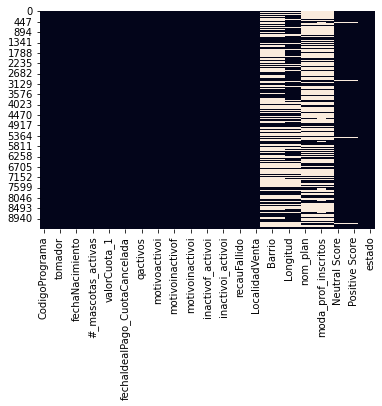

In [58]:
sns.heatmap(data.isnull(), cbar=False)

Los ultimos datos adicionados presentan gran cantidad de nulos casi el 30% de los 9000 registros, revisaremos si aportan valor, en caso de ser así se tendrian en cuenta esos 3000 registros.Casi todos los datos nulos estan presentes en Nivel SocioEconomico, Localidad, Latitud, profesion del tomador y la moda del parentesco

In [59]:
data.corr().reset_index().iloc[-1]

index                      estado
CodigoPrograma           0.317662
edad                    -0.005813
#_inscritos_activos      0.017374
#_mascotas_activas       0.050874
valorCuota_1             0.056241
valorUltimaCuota         0.056796
qinactivos              -0.480678
qactivos                 0.309882
recauExitoso             0.168393
recauFallido            -0.076605
Nivel Socio Economico    0.028694
Longitud                -0.030594
Latitud                   0.00737
Neutral Score            0.258462
Negative Score          -0.316817
Positive Score           0.176617
estado                        1.0
Name: 16, dtype: object

Resalta la cantidad de veces que un usuario a estado inactivo o ativo, recaudo exitoso y los score del sentimiento

<h4>Atipicos y análisis univariado</h4>

In [60]:
data.columns

Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'FechaRescindido', 'valorCuota_1', 'valorUltimaCuota',
       'fechaIdealPago_CuotaCancelada', 'qinactivos', 'qactivos',
       'fechaactivoi', 'motivoactivoi', 'fechainactivof', 'motivoinactivof',
       'fechainactivoi', 'motivoinactivoi', 'fechaactivof',
       'inactivof_activoi', 'inactivof_activof', 'inactivoi_activoi',
       'recauExitoso', 'recauFallido', 'Direccion', 'LocalidadVenta',
       'Nivel Socio Economico', 'Barrio', 'Localidad', 'Longitud', 'Latitud',
       'nom_plan', 'profesion_tomador', 'moda_prof_inscritos',
       'moda_parentesco', 'Neutral Score', 'Negative Score', 'Positive Score',
       'motivo', 'estado'],
      dtype='object')

In [61]:
data["tomador"].duplicated().sum()

1062

In [62]:
data[data["tomador"].duplicated(keep=False)].sort_values("tomador").head(6)


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,FechaRescindido,valorCuota_1,valorUltimaCuota,...,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score,motivo,estado
8151,154641,2022-06-16,Abilian Bedoya Henao,58.0,1964-11-15,0.0,1.0,9999-12-31 00:00:00.000,8500.0,9800.0,...,NaN,Aurora Plus 2020,Ama de casa,Ama de casa,TITULAR,0.867696,0.048420,0.083884,Activo para verificación,1
8152,154641,2022-06-16,Abilian Bedoya Henao,58.0,1964-11-15,0.0,1.0,9999-12-31 00:00:00.000,8500.0,9800.0,...,NaN,Asistencia Exequial Mascota 2020,Ama de casa,Ama de casa,TITULAR,0.867696,0.048420,0.083884,Activo para verificación,1
7369,128131,2021-09-15,Ada Melva Gonzalez Vargas,55.0,1967-04-17,0.0,2.0,9999-12-31 00:00:00.000,17000.0,19600.0,...,NaN,Asistencia Exequial Mascota 2020,Independiente,Independiente,Mascota,0.741749,0.186246,0.072005,Activo,1
5473,70895,2019-02-06,Ada Melva Gonzalez Vargas,55.0,1967-04-17,0.0,1.0,2022-02-08 05:00:00.000,7500.0,9800.0,...,NaN,Asistencia Exequial Mascota 2020,Independiente,Independiente,Mascota,0.746060,0.175735,0.078205,Fallecimiento de la mascota,0
3134,30725,2019-08-24,Adolfo Garcia Garcia,68.0,1955-01-01,8.0,0.0,2021-06-25 05:00:00.000,22600.0,23600.0,...,NaN,Maval Plus Promotora La Aurora,Agricultor,Agricultor - Ama de casa,Hija,0.409690,0.511536,0.078774,Incumplimiento en compromiso de pago,0
8682,148605,2022-02-26,Adolfo Garcia Garcia,68.0,1955-01-01,8.0,0.0,2022-09-11 06:00:01.330,17000.0,19100.0,...,5.126926,Maval Plus Promotora La Aurora,Agricultor,Agricultor - Ama de casa,Hija,0.505632,0.471268,0.023100,Inactivo rescindido,0


Existe la posibilidad que un mismo tomador este en varios programas,sin embargo, no es valido que se repita el codigo del programa, como en el caso anterior eliminaremos codigos de programa repetidos, segundo existen usuarios que se les han cambiado los programas por alguna razón, en el caso anterior se presentan 2 uno por fallecimiento de la mascota y 2 por incumplimiento, se conservan estos registros podrían aportar información.

In [63]:
data.drop(data[data["CodigoPrograma"].duplicated(keep="first")].index, inplace=True)


<AxesSubplot:ylabel='Frequency'>

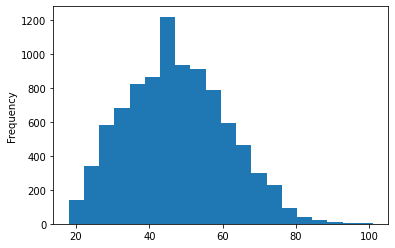

In [64]:
data["edad"].plot.hist(bins=20)

In [65]:
data[["CodigoPrograma", "edad"]].groupby("edad")\
    .count().reset_index().sort_values("CodigoPrograma")

,edad,CodigoPrograma
79,101.0,1
77,96.0,1
76,94.0,1
75,93.0,1
74,92.0,1
...,...,...
25,43.0,242
34,52.0,244
33,51.0,251
32,50.0,265


Los tomadores se mantiene entre los 40 y 60 años, la edad tiene un comportamiento normal, donde la moda es 44 años. Se cuenta con personas de hasta los 100 años en mucha menor medida. El tomador con mayor edad tiene 101 años. Revisemos a partir de 80 cuantos programas estan activos

In [66]:
data[(data["edad"] > 80) & (data["estado"]==1)].count()[1]

14

Estos datos atipicos se deben conservar ya que incluso existen 14 programas que se encuentran activos despues de los 80 años. Podemos eliminar la columna Fecha de Nacimiento la cual es redundante con la edad

In [67]:
data.drop("fechaNacimiento", axis=1, inplace=True)

<AxesSubplot:ylabel='Frequency'>

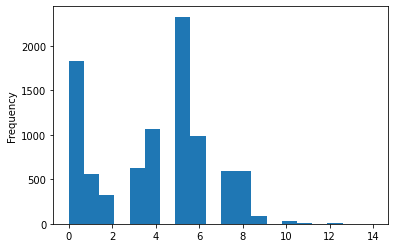

In [68]:
data["#_inscritos_activos"].plot.hist(bins=20)


<AxesSubplot:>

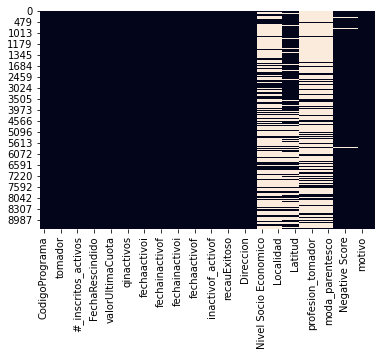

In [69]:
temp =data[(data["#_inscritos_activos"] == 0) & (data["#_mascotas_activas"] == 0)]
sns.heatmap(temp.isnull(), cbar=False)


Existen 300 programa con 0 inscritos y 0 mascotas. Esto no tiene mucho sentido, dado que se debe tener algun inscrito, se procede a eliminar los registros. Estos mismos tienen mucho registro nulo

In [70]:
data.drop(temp.index, inplace=True)

<AxesSubplot:ylabel='Frequency'>

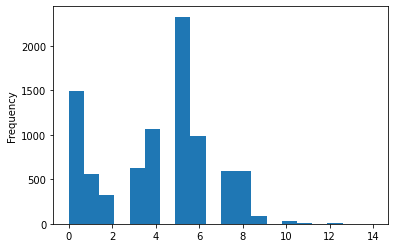

In [71]:
data["#_inscritos_activos"].plot.hist(bins=20)


También observamos datos atipicos a partir de 9 inscritos

In [72]:
data[["CodigoPrograma", "#_inscritos_activos"]].groupby("#_inscritos_activos")\
    .count().reset_index().sort_values("CodigoPrograma").head(6)


,#_inscritos_activos,CodigoPrograma
13,13.0,1
14,14.0,2
11,11.0,10
12,12.0,10
10,10.0,28
9,9.0,84


In [73]:
data[data["#_inscritos_activos"] > 8].head()

,CodigoPrograma,fechaSolicitud,tomador,edad,#_inscritos_activos,#_mascotas_activas,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,...,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score,motivo,estado
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,12.0,0.0,2020-12-18 06:00:00.790,30100.0,31100.0,2020-08-16,...,5.475582,NaN,NaN,NaN,NaN,0.671160,0.193641,0.135199,Incumplimiento en compromiso de pago,0
90,1505,2019-10-08,Jhon Jaime Castro Marin,57.0,10.0,0.0,9999-12-31 00:00:00.000,33300.0,33300.0,2023-11-09,...,NaN,Aurora Plus 2020,Empleado (a),Estudiante,Hijo,0.742915,0.172037,0.085048,Activo,1
277,2598,2015-01-08,Laura Arango Zuluaga,51.0,9.0,0.0,2020-08-31 05:00:00.000,17000.0,17000.0,2020-04-01,...,5.073114,NaN,NaN,NaN,NaN,0.613547,0.357184,0.029270,Incumplimiento en compromiso de pago,0
298,2847,2019-01-31,William Viveros Andrade,56.0,9.0,0.0,9999-12-31 00:00:00.000,31500.0,34700.0,2023-04-01,...,40.685376,Aurora Plus Mas 2020,Ingeniero (a),Empleado (a),Hijo,0.381685,0.560704,0.057611,Activo,1
320,3084,2019-11-30,Fabian Perez Soto,39.0,9.0,0.0,2019-11-19 13:12:00.000,19100.0,20100.0,2019-12-30,...,6.113371,NaN,NaN,NaN,NaN,0.757675,0.223180,0.019145,Dificultad para ubicarlo,0


Se consulta con la entidad y afirman que son acuerdos normales y si existen

<AxesSubplot:ylabel='Frequency'>

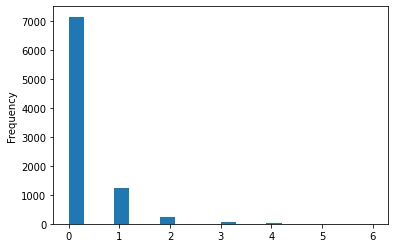

In [74]:
data["#_mascotas_activas"].plot.hist(bins=20)


In [75]:
data[["CodigoPrograma", "#_mascotas_activas"]].groupby("#_mascotas_activas")\
    .count().reset_index().sort_values("CodigoPrograma")


,#_mascotas_activas,CodigoPrograma
6,6.0,2
5,5.0,9
4,4.0,15
3,3.0,59
2,2.0,230
1,1.0,1246
0,0.0,7142


In [76]:
data[data["#_mascotas_activas"] > 2].head()

,CodigoPrograma,fechaSolicitud,tomador,edad,#_inscritos_activos,#_mascotas_activas,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,...,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score,motivo,estado
55,1011,2019-09-07,Maryori Gomez Cruz,57.0,0.0,3.0,2020-07-22 05:00:00.000,16500.0,19500.0,2020-03-07,...,NaN,Diamante Coopsocial,Ama de casa,No Identificada,Hermana - Hermano,0.521643,0.465157,0.013200,Incumplimiento en compromiso de pago,0
451,3834,2019-11-29,Mary Luz Carvajal Hurtado,46.0,0.0,5.0,2021-06-23 05:00:00.000,30000.0,30000.0,2021-03-01,...,5.071508,NaN,NaN,NaN,NaN,0.447249,0.521408,0.031343,Problemas económicos,0
631,4947,2018-03-22,Olga Lucia Mejia Ramirez,37.0,0.0,3.0,2022-05-02 05:00:00.000,25500.0,29400.0,2022-04-28,...,5.045522,NaN,NaN,NaN,NaN,0.662631,0.296656,0.040713,Influencia de seres cercanos,0
698,4938,2019-12-18,Leidy Johana Contreras Naranjo,31.0,0.0,4.0,9999-12-31 00:00:00.000,31000.0,36200.0,2022-12-31,...,5.061414,Asistencia Exequial Mascota 2020,Docente,NaN,Mascota,0.719000,0.169746,0.111254,Activo,1
1152,10411,2001-03-25,Olga Beatriz Montes Sanchez,49.0,4.0,3.0,2022-08-31 06:00:01.970,46200.0,53200.0,2022-04-07,...,NaN,Maval Plus Promotora La Aurora,Empleado (a),Empleado (a),Mascota,0.410486,0.425652,0.163862,Inactivo rescindido,0


Todo parece estar normal para el caso de mascotas

In [77]:
temp = data[data["valorUltimaCuota"] == 0]
temp.head()

,CodigoPrograma,fechaSolicitud,tomador,edad,#_inscritos_activos,#_mascotas_activas,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,...,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score,motivo,estado
768,7272,2018-04-03,Julieth Camila Olaya Garzon,27.0,5.0,0.0,2022-03-31 05:00:00.000,0.0,0.0,2022-03-15,...,NaN,NaN,NaN,NaN,NaN,0.767634,0.102759,0.129608,No Interesado,0
3454,36265,2020-07-01,Harrison Rodriguez Muriel,47.0,7.0,0.0,2021-01-26 06:00:01.173,19000.0,0.0,2020-08-18,...,NaN,NaN,NaN,NaN,NaN,0.865504,0.065463,0.069033,Incumplimiento en compromiso de pago,0
5690,74123,2019-10-19,Mary Yeglin Vasquez Mendoza,38.0,5.0,0.0,2021-05-05 05:00:00.000,15100.0,0.0,2020-12-20,...,5.271602,NaN,NaN,NaN,NaN,0.826991,0.134555,0.038454,Problemas económicos,0
5886,74144,2020-11-08,Yolian Aguirre Gallego,56.0,2.0,0.0,2022-01-07 05:00:00.000,0.0,0.0,2021-09-10,...,5.271896,NaN,NaN,NaN,NaN,0.673007,0.269452,0.057541,Dificultad para ubicarlo,0
6592,109119,2021-06-22,Elvis Meneses Lara,45.0,6.0,0.0,9999-12-31 00:00:00.000,20600.0,0.0,2023-01-23,...,NaN,Aurora Plus 2020,Independiente,Estudiante,Hijo,0.778931,0.100822,0.120247,Activo,1


No pueden haber valores con 0 en la cuota se procede a eliminar

In [78]:
data.drop(temp.index, inplace=True)

<AxesSubplot:ylabel='Frequency'>

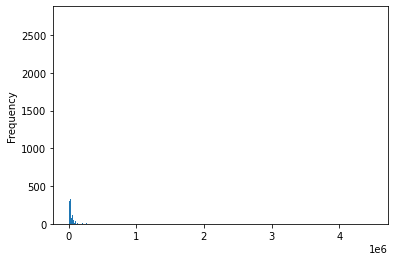

In [79]:
data["valorUltimaCuota"] = data["valorUltimaCuota"].astype(int)
data["valorUltimaCuota"].plot.hist(bins=1000)


La presente grafica trata de mostrar que los valores estan presentes en el comienzo sin embargo, hay valores atipicos que lo llevan a 4.000.000, dado la amplitud, los eliminaremos.

In [80]:
percentil95 = data["valorUltimaCuota"].quantile(q=0.95)
percentil95


62400.0

<AxesSubplot:ylabel='Frequency'>

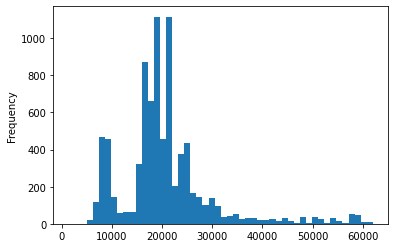

In [81]:
data[data["valorUltimaCuota"] <
     percentil95]["valorUltimaCuota"].plot.hist(bins=50)


In [82]:
temp = data[["CodigoPrograma", "valorUltimaCuota", "#_inscritos_activos", "#_mascotas_activas"]
            ][data["valorUltimaCuota"] > percentil95].sort_values("#_inscritos_activos")                                                                    
temp


,CodigoPrograma,valorUltimaCuota,#_inscritos_activos,#_mascotas_activas
7722,146898,75011,0.0,1.0
3850,37458,73332,0.0,1.0
6106,82559,73332,0.0,1.0
6138,81141,102000,0.0,1.0
8631,163953,80000,0.0,1.0
...,...,...,...,...
4689,53964,78300,9.0,0.0
7732,136991,187200,10.0,0.0
5841,77815,112300,11.0,0.0
6193,84896,94500,11.0,0.0


In [83]:
data.drop(temp.index, inplace=True)

In [84]:
temp = data[["CodigoPrograma", "valorCuota_1", "#_inscritos_activos", "#_mascotas_activas"]
            ][data["valorCuota_1"] > percentil95].sort_values("#_inscritos_activos")
temp


,CodigoPrograma,valorCuota_1,#_inscritos_activos,#_mascotas_activas
6359,87095,67500.0,0.0,3.0
9282,160137,80000.0,0.0,1.0
6615,110162,108600.0,1.0,0.0
7569,133338,88290.0,1.0,0.0
4389,51903,84300.0,5.0,0.0
5466,69080,171500.0,5.0,0.0
5489,69999,63000.0,5.0,0.0
8552,150586,64500.0,5.0,0.0
8029,148858,81000.0,6.0,0.0
6564,107223,66300.0,7.0,0.0


In [85]:
data.drop(temp.index, inplace=True)

Dada la amplitud y la baja frecuencia, eliminaremos estos registros


In [86]:
data[["CodigoPrograma", "valorUltimaCuota"]].groupby("valorUltimaCuota")\
    .count().reset_index().sort_values("CodigoPrograma").tail(20)


,valorUltimaCuota,CodigoPrograma
136,20600,78
69,15100,79
261,29400,80
177,23300,99
6,6500,102
109,18600,106
123,19600,106
191,24100,123
68,15000,139
11,7500,172


Los valores más frecuentes de cuota rondan los 20.000

In [87]:
data[["CodigoPrograma", "qinactivos"]].groupby("qinactivos")\
    .count().reset_index().sort_values("CodigoPrograma")


,qinactivos,CodigoPrograma
5,6,3
4,5,7
3,4,194
2,3,1460
1,2,2997
0,1,3603


In [88]:
data[["CodigoPrograma", "qactivos"]].groupby("qactivos")\
    .count().reset_index().sort_values("CodigoPrograma")


,qactivos,CodigoPrograma
4,5,4
3,4,92
1,2,1959
0,1,2323
2,3,3886


Existen casos donde un usuario estuvo activo hasta una 3 vez, lo mismo con su inactividad, es normal que este se active hasta 2 veces, sin embargo, ya una 3 vez es un usuario recuperado. Estas 2 variables las convertiremos en una sola donde nos indica si el usuario ha estado activo por más de 3 ocasiones donde 0 es que no estuvo activo 3 veces o 1 es que si lo estuvo. A esta variable la llamaremos reintegrado

In [89]:
data["reintegrado"] = data["qactivos"].apply(lambda x: 1 if x > 2 else 0)
data.drop(["qactivos", "qinactivos"], axis=1, inplace=True)
data.head()

,CodigoPrograma,fechaSolicitud,tomador,edad,#_inscritos_activos,#_mascotas_activas,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,...,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score,motivo,estado,reintegrado
1,59,2018-09-10,Luis Roberto Murillo,68.0,5.0,0.0,2021-04-07 05:00:00.000,15100.0,16100,2020-12-10,...,NaN,NaN,NaN,NaN,0.421943,0.563205,0.014852,Dificultad para ubicarlo,0,0
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,12.0,0.0,2020-12-18 06:00:00.790,30100.0,31100,2020-08-16,...,NaN,NaN,NaN,NaN,0.671160,0.193641,0.135199,Incumplimiento en compromiso de pago,0,0
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,2.0,0.0,9999-12-31 00:00:00.000,20800.0,24300,2024-07-29,...,Aurora Plus 2020,Agricultor,Agricultor - Ama de casa - Estudiante,Compañera - Hija - TITULAR,0.823568,0.033186,0.143247,Activo,1,0
4,260,2019-04-08,Marcela Ruiz Montes,51.0,5.0,0.0,2020-10-09 06:00:00.950,15100.0,16100,2020-06-09,...,NaN,NaN,NaN,NaN,0.303887,0.681288,0.014825,Dificultad para ubicarlo,0,0
5,108,2019-01-04,Sefora Alberis Caicedo Nieto,28.0,3.0,0.0,2022-02-21 06:00:01.210,18100.0,18100,2021-10-20,...,NaN,NaN,NaN,NaN,0.635210,0.206120,0.158671,Dificultad para ubicarlo,0,0


Duracion de los programas

Actualmente tenemos información de diferencias entre fecha de actividad e inactividad, sin embargo, en las reglas de negocio no tendremos la fecha de inactivadad, todas estas variables con datos de inactividad se eliminan

In [90]:
data.drop(['FechaRescindido','fechainactivof', 'motivoinactivof', 'fechainactivoi',\
    'motivoinactivoi', 'inactivof_activoi','inactivof_activof', 'inactivoi_activoi'], axis=1, inplace=True)
data.columns


Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       '#_inscritos_activos', '#_mascotas_activas', 'valorCuota_1',
       'valorUltimaCuota', 'fechaIdealPago_CuotaCancelada', 'fechaactivoi',
       'motivoactivoi', 'fechaactivof', 'recauExitoso', 'recauFallido',
       'Direccion', 'LocalidadVenta', 'Nivel Socio Economico', 'Barrio',
       'Localidad', 'Longitud', 'Latitud', 'nom_plan', 'profesion_tomador',
       'moda_prof_inscritos', 'moda_parentesco', 'Neutral Score',
       'Negative Score', 'Positive Score', 'motivo', 'estado', 'reintegrado'],
      dtype='object')

Lo que haremos es tomar la fecha actual y restarle la fecha en que el usuario estuvo activo por primera vez y por ultima vez. Así tendremos la duración que ha tenido el programa

In [91]:
now = datetime.now()
data["duracionActivoI"] = (
    now - pd.to_datetime(data["fechaSolicitud"])).dt.days
data["duracionActivoF"] = (
    now - pd.to_datetime(data["fechaactivof"])).dt.days
data.drop(["fechaactivoi", "fechaactivof",
          "fechaSolicitud"], axis=1, inplace=True)


In [92]:
data.columns


Index(['CodigoPrograma', 'tomador', 'edad', '#_inscritos_activos',
       '#_mascotas_activas', 'valorCuota_1', 'valorUltimaCuota',
       'fechaIdealPago_CuotaCancelada', 'motivoactivoi', 'recauExitoso',
       'recauFallido', 'Direccion', 'LocalidadVenta', 'Nivel Socio Economico',
       'Barrio', 'Localidad', 'Longitud', 'Latitud', 'nom_plan',
       'profesion_tomador', 'moda_prof_inscritos', 'moda_parentesco',
       'Neutral Score', 'Negative Score', 'Positive Score', 'motivo', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF'],
      dtype='object')

Podemos obtener los incrementos que han tenido la cuota restando valorCuota_1 y el valorUltimaCuota

In [93]:
data["incrementoCuota"] = data["valorUltimaCuota"] - data["valorCuota_1"]

Eliminamos valor de la cuota 1 porque estaría representado en el incremento, información reduntente, pero con menos cantidades

In [94]:
data.drop("valorCuota_1", axis=1, inplace=True)

Tenemos el día del mes que se esta cobrando la cuota, sin embargo, viene acompañado de meses y años, que tal vez no expresan una misma situación para no descartar esta variable y dado que es una cuota que se cobra siempre cada mes, obtendremos solo el día a partir de esta fecha

In [95]:
data["diaPago"] = pd.to_datetime(data["fechaIdealPago_CuotaCancelada"]).dt.day
data.columns

Index(['CodigoPrograma', 'tomador', 'edad', '#_inscritos_activos',
       '#_mascotas_activas', 'valorUltimaCuota',
       'fechaIdealPago_CuotaCancelada', 'motivoactivoi', 'recauExitoso',
       'recauFallido', 'Direccion', 'LocalidadVenta', 'Nivel Socio Economico',
       'Barrio', 'Localidad', 'Longitud', 'Latitud', 'nom_plan',
       'profesion_tomador', 'moda_prof_inscritos', 'moda_parentesco',
       'Neutral Score', 'Negative Score', 'Positive Score', 'motivo', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF', 'incrementoCuota',
       'diaPago'],
      dtype='object')

Eliminamos la columna, ya que la información de interes se queda en dia de pago

In [96]:
data.drop("fechaIdealPago_CuotaCancelada", axis=1, inplace=True)


In [97]:
data.groupby("motivoactivoi")["motivoactivoi"].count()


motivoactivoi
 Activo                            9
 Activo para verificación        341
 Creacion de Solicitud          7912
 Programa con inconsistencia       2
Name: motivoactivoi, dtype: int64

In [98]:
data[data["estado"] == 1].groupby("motivo")["motivo"].count()


motivo
 Activo                         2137
 Activo para verificación        366
 Pendiente de autorización         3
 Programa con inconsistencia      39
Name: motivo, dtype: int64

Motivo activo inicial y motivo no nos esta dando mucha información de interes cuando solo sabemos que es un programa activo, procedemos a eliminarlo. Estas variables serán utiles para predecir en un futuro la razón de la inactividad en caso de que no se tenga

In [99]:
data.drop(["motivo", "motivoactivoi"], axis=1, inplace=True)
data.columns


Index(['CodigoPrograma', 'tomador', 'edad', '#_inscritos_activos',
       '#_mascotas_activas', 'valorUltimaCuota', 'recauExitoso',
       'recauFallido', 'Direccion', 'LocalidadVenta', 'Nivel Socio Economico',
       'Barrio', 'Localidad', 'Longitud', 'Latitud', 'nom_plan',
       'profesion_tomador', 'moda_prof_inscritos', 'moda_parentesco',
       'Neutral Score', 'Negative Score', 'Positive Score', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF', 'incrementoCuota',
       'diaPago'],
      dtype='object')

En varios usuarios se evidencia recaudos exitosos entre 3 a 8 veces. Sin embargo, se ha llegado a tener gestion de cartera exitosa en un mismo programa hasta por 90 veces

<AxesSubplot:ylabel='Frequency'>

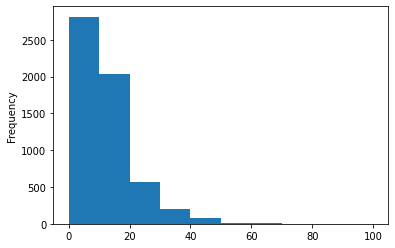

In [100]:
data[data["estado"] == 0]["recauExitoso"].plot.hist(bins=10, range=(0,100))


<AxesSubplot:ylabel='Frequency'>

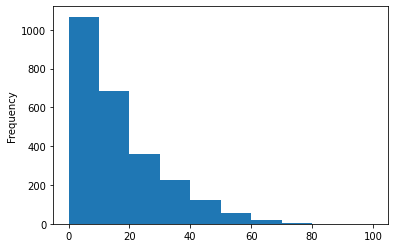

In [101]:
data[data["estado"] == 1]["recauExitoso"].plot.hist(bins=10, range=(0, 100))


<AxesSubplot:ylabel='Frequency'>

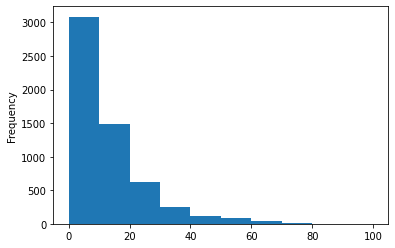

In [102]:
data[data["estado"] == 0]["recauFallido"].plot.hist(bins=10, range=(0, 100))


<AxesSubplot:ylabel='Frequency'>

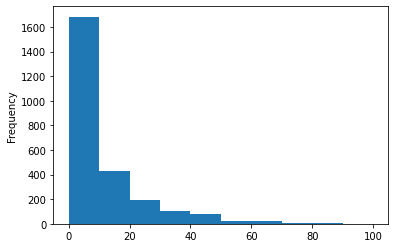

In [103]:
data[data["estado"] == 1]["recauFallido"].plot.hist(bins=10, range=(0, 100))


Se logra ver un poco la diferenciación entre recaudos fallidos de activos e inactivos, son mayores en los activos. Se conservan las variables

In [104]:
data.columns

Index(['CodigoPrograma', 'tomador', 'edad', '#_inscritos_activos',
       '#_mascotas_activas', 'valorUltimaCuota', 'recauExitoso',
       'recauFallido', 'Direccion', 'LocalidadVenta', 'Nivel Socio Economico',
       'Barrio', 'Localidad', 'Longitud', 'Latitud', 'nom_plan',
       'profesion_tomador', 'moda_prof_inscritos', 'moda_parentesco',
       'Neutral Score', 'Negative Score', 'Positive Score', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF', 'incrementoCuota',
       'diaPago'],
      dtype='object')

In [105]:
data = data.rename(columns={"#_inscritos_activos": "Qinscritos",\
    "#_mascotas_activas": "Qmascotas",\
        "valorUltimaCuota":"valorCuota",\
            "recauExitoso": "QrecauExitoso", "recauFallido": "QrecauFallido"})
data.columns

Index(['CodigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'Direccion',
       'LocalidadVenta', 'Nivel Socio Economico', 'Barrio', 'Localidad',
       'Longitud', 'Latitud', 'nom_plan', 'profesion_tomador',
       'moda_prof_inscritos', 'moda_parentesco', 'Neutral Score',
       'Negative Score', 'Positive Score', 'estado', 'reintegrado',
       'duracionActivoI', 'duracionActivoF', 'incrementoCuota', 'diaPago'],
      dtype='object')

La direccion ya la obtenemos dada la latitud y la longitud

In [106]:
data["Longitud"].isna().sum()

3036

In [107]:
len(data["Direccion"].unique())

7377

Tenemos 3000 datos sin longitud y latitud mientras que en dirección solo 1000, sin embargo, la dirección no aporta mucho al modelo, dado que no son valores numericos y que se repitan constantemente en este caso hay 7377 direcciones diferentes. Por lo tanto solo quedamos con Longitud y latitud

In [108]:
data.drop("Direccion", axis=1, inplace=True)


In [109]:
data.columns


Index(['CodigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'LocalidadVenta',
       'Nivel Socio Economico', 'Barrio', 'Localidad', 'Longitud', 'Latitud',
       'nom_plan', 'profesion_tomador', 'moda_prof_inscritos',
       'moda_parentesco', 'Neutral Score', 'Negative Score', 'Positive Score',
       'estado', 'reintegrado', 'duracionActivoI', 'duracionActivoF',
       'incrementoCuota', 'diaPago'],
      dtype='object')

In [110]:
data[["LocalidadVenta", "CodigoPrograma"]].groupby("LocalidadVenta").count()

,CodigoPrograma
LocalidadVenta,
Aranzazu,46
Arauca,45
Bogota,307
Call Center Manizales,36
Chiquinquira,314
Dosquebradas,343
Herveo,12
Kennedy,269
La Dorada,335


Más del 50% de los datos estan en una misma localidad que es Manizales, sin embargo, saber que esta en otra localidad podría aportar al modelo

In [111]:
data = data.rename(columns={"LocalidadVenta": "localidadVenta"})
data.columns


Index(['CodigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'localidadVenta',
       'Nivel Socio Economico', 'Barrio', 'Localidad', 'Longitud', 'Latitud',
       'nom_plan', 'profesion_tomador', 'moda_prof_inscritos',
       'moda_parentesco', 'Neutral Score', 'Negative Score', 'Positive Score',
       'estado', 'reintegrado', 'duracionActivoI', 'duracionActivoF',
       'incrementoCuota', 'diaPago'],
      dtype='object')

Nivel socio economico

In [112]:
data[["Nivel Socio Economico", "CodigoPrograma"]
     ].groupby("Nivel Socio Economico").count()


,CodigoPrograma
Nivel Socio Economico,
0.0,547
1.0,357
2.0,921
3.0,1208
4.0,317
5.0,35
6.0,60


Esta variable presenta campos nulos en casi una tercera parte de los registros, no sería buena alternativa eliminar los registros, no podemos imputar la moda de este porque podría tener un impacto significativo, esto viene relacionado con que no tenemos los datos de longitud y latitud de las variables. Para no llenar los valores con 0 que sería nuestra alternativa final, haremos una agrupación por profesión del tomador para mirar que datos podríamos llenar teniendo en cuenta su profesión

In [113]:
imputar = data[["Nivel Socio Economico", "profesion_tomador"]
               ].dropna().groupby("profesion_tomador").agg(pd.Series.mode)
imputar["Nivel Socio Economico"] = imputar["Nivel Socio Economico"].apply(
    lambda x: x[1] if type(x) is np.ndarray else x)
imputar = imputar.dropna()
imputar

,Nivel Socio Economico
profesion_tomador,
Abogado (a),3.0
Administrador (a),3.0
Agente,3.0
Agricultor,0.0
Agronomo,3.0
...,...
Trabajador Social,3.0
Transportador,3.0
Vendedor (a),3.0


In [114]:
data = data.reset_index().drop("index", axis=1) #reset index
data = data.fillna(np.nan)


In [115]:
def imputar_valor(row, columna_imputar, columna_imputacion, df_imputacion):
    if pd.notnull(row[columna_imputar]) or pd.isnull(row[columna_imputacion])\
            or row[columna_imputacion] not in df_imputacion.index:
        return row[columna_imputar]
    else:
        return df_imputacion.loc[row[columna_imputacion]][columna_imputar]


In [116]:
data["nivelEconomico"] = data.apply(lambda row:
                                    imputar_valor(row, "Nivel Socio Economico",
                                                  "profesion_tomador", imputar), axis=1)


In [117]:
data["nivelEconomico"].isna().sum()

3105

In [118]:
data["Nivel Socio Economico"].isna().sum()  # Cantidad de registros


4819

In [119]:
data = data.drop("Nivel Socio Economico", axis=1)
data[["nivelEconomico", "CodigoPrograma"]].groupby("nivelEconomico").count()


,CodigoPrograma
nivelEconomico,
0.0,691
1.0,365
2.0,1068
3.0,2623
4.0,317
5.0,35
6.0,60


Se logran imputar alrededor de 1000 registros

In [120]:
data.columns


Index(['CodigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'localidadVenta',
       'Barrio', 'Localidad', 'Longitud', 'Latitud', 'nom_plan',
       'profesion_tomador', 'moda_prof_inscritos', 'moda_parentesco',
       'Neutral Score', 'Negative Score', 'Positive Score', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF', 'incrementoCuota',
       'diaPago', 'nivelEconomico'],
      dtype='object')

El barrio y localidad tiene también un numero de nulos cercano al 50%, para imputarlos usaremos la moda de la localidad venta

In [121]:
data["Barrio"].isna().sum()

4819

In [122]:
data["Localidad"].isna().sum()


4819

In [123]:
imputar = data[["localidadVenta", "Barrio"]
               ].dropna().groupby("localidadVenta").agg(pd.Series.mode)
imputar["Barrio"] = imputar["Barrio"].apply(
      lambda x: x[1] if type(x) is np.ndarray else x)
imputar = imputar.dropna()
imputar.head(10)


,Barrio
localidadVenta,
Aranzazu,0
Arauca,LAS AMERICAS
Bogota,SANTA BARBARA
Chiquinquira,BOYACÃ
Dosquebradas,LOS NARANJOS
Herveo,0
La Dorada,0
Manizales,0
Marquetalia,0


In [124]:
data["barrio"] = data.apply(lambda row: imputar_valor(row, "Barrio", "localidadVenta", imputar), axis=1)
data.drop("Barrio", axis=1, inplace=True)


In [125]:
data["barrio"].isna().sum()


464

En este caso logramos imputar gran cantidad de elementos aunque la localidad de la venta es muy general

In [126]:
imputar = data[["localidadVenta", "Localidad"]
               ].dropna().groupby("localidadVenta").agg(pd.Series.mode)
imputar
imputar["Localidad"] = imputar["Localidad"].apply(
    lambda x: x[1] if type(x) is np.ndarray else x)
imputar = imputar.dropna()
imputar.head(2)


,Localidad
localidadVenta,
Aranzazu,0
Arauca,0


In [127]:
data["localidad"] = data.apply(lambda row: imputar_valor(
    row, "localidadVenta", "Localidad", imputar), axis=1)
data = data.drop("Localidad", axis=1)
data["localidad"].isna().sum()


0

In [128]:
data[["barrio", "CodigoPrograma"]].groupby("barrio").count()


,CodigoPrograma
barrio,
0,4261
11 DE NOVIEMBRE,5
20 DE JULIO,27
A.S.D.,5
AEROPUERTO EL DORADO,1
...,...
VIVEROS,16
VOTO NACIONAL,2
ZONA INDUSTRIAL,1


In [129]:
data[["localidad", "CodigoPrograma"]].groupby("localidad").count()


,CodigoPrograma
localidad,
Aranzazu,46
Arauca,45
Bogota,307
Call Center Manizales,36
Chiquinquira,314
Dosquebradas,343
Herveo,12
Kennedy,269
La Dorada,335


<AxesSubplot:ylabel='Frequency'>

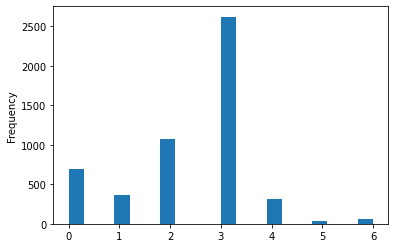

In [130]:
data["nivelEconomico"].plot.hist(bins=20)


El nivel socio economico medio y bajo contiene a la mayoría de los programas, mientras que en los altos se evidencia menor afiliación a los planes exequiales

In [131]:
data[["barrio", "CodigoPrograma"]].groupby(
    "barrio").count().sort_values("CodigoPrograma")


,CodigoPrograma
barrio,
LAS MARGARITAS,1
LUNAPARK,1
MARTILLO MODELO,1
MERCURIO,1
MINUTO DE DIOS,1
...,...
LAS AMERICAS,94
BOYACÃ,176
SANTA BARBARA,184


In [132]:
data[["localidad", "CodigoPrograma"]].groupby(
    "localidad").count().sort_values("CodigoPrograma")


,CodigoPrograma
localidad,
Puerto Venus,2
Marulanda,8
Herveo,12
Call Center Manizales,36
Pensilvania,39
Marquetalia,39
Tunja,41
Arauca,45
Aranzazu,46


Gran cantidad de personas ubicadas en Manizales, seguido por una 5 parte en Tequendama

In [133]:
data.columns

Index(['CodigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'localidadVenta',
       'Longitud', 'Latitud', 'nom_plan', 'profesion_tomador',
       'moda_prof_inscritos', 'moda_parentesco', 'Neutral Score',
       'Negative Score', 'Positive Score', 'estado', 'reintegrado',
       'duracionActivoI', 'duracionActivoF', 'incrementoCuota', 'diaPago',
       'nivelEconomico', 'barrio', 'localidad'],
      dtype='object')

In [134]:
data["Longitud"].isna().sum()

3036

Los valores de longitud y latitud son un poco más complicados de imputar, por tal razón,tendremos en cuenta la localidad para estos 3036 registros y buscaremos su centroide principal

In [135]:
unicos = data[data["Longitud"].isna()][["localidad", "Latitud", "Longitud"]].drop_duplicates()
unicos

,localidad,Latitud,Longitud
9,La Dorada,NaN,NaN
12,Manizales,NaN,NaN
221,Marquetalia,NaN,NaN
791,Arauca,NaN,NaN
874,Dosquebradas,NaN,NaN
927,Kennedy,NaN,NaN
1075,Chiquinquira,NaN,NaN
1308,Restrepo,NaN,NaN
1499,Tequendama,NaN,NaN
1573,Bogota,NaN,NaN


Promotora la Aurora y Call Center Manizales, serán remplazados por Manizales

In [136]:
drop = unicos[(unicos["localidad"] == "Promotora La Aurora S.A.S. Sin Oficina") |
       (unicos["localidad"] == "Call Center Manizales")].index
unicos.drop(drop, inplace= True)
unicos

,localidad,Latitud,Longitud
9,La Dorada,NaN,NaN
12,Manizales,NaN,NaN
221,Marquetalia,NaN,NaN
791,Arauca,NaN,NaN
874,Dosquebradas,NaN,NaN
927,Kennedy,NaN,NaN
1075,Chiquinquira,NaN,NaN
1308,Restrepo,NaN,NaN
1499,Tequendama,NaN,NaN
1573,Bogota,NaN,NaN


Usaremos el centroide principal de las ciudades para estos valores vacios

In [137]:
def get_latitude_longitude(city):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": city,
        "format": "json",
        "limit": 1
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if response.status_code == 200 and data:
            place = data[0]
            latitude = float(place["lat"])
            longitude = float(place["lon"])
            return latitude, longitude
        else:
            return None

    except requests.exceptions.RequestException as e:
        return str(e)


latitudes = []
longitudes = []
for ciudad in unicos["localidad"]:
    latitude, longitude = get_latitude_longitude(ciudad)
    latitudes.append(latitude)
    longitudes.append(longitude)
latitudes

[5.4544379,
 5.0668907,
 5.2966038,
 6.7940425,
 4.8339551,
 48.641925,
 5.6182733,
 4.2615882,
 4.60178705,
 4.6529539,
 5.315719850000001,
 43.156731,
 5.5324313,
 40.9699889,
 5.049223,
 5.5200484]

In [138]:
imputar = pd.DataFrame()
imputar["localidad"] = unicos["localidad"]
imputar["Longitud"] = longitudes
imputar["Latitud"] = latitudes
imputar = imputar.set_index("localidad")
imputar


,Longitud,Latitud
localidad,,
La Dorada,-74.663369,5.454438
Manizales,-75.506666,5.066891
Marquetalia,-75.054606,5.296604
Arauca,-70.496162,6.794042
Dosquebradas,-75.671301,4.833955
Kennedy,-96.908948,48.641925
Chiquinquira,-73.816748,5.618273
Restrepo,-73.563038,4.261588
Tequendama,-74.450942,4.601787


Reemplazamos primero valores sin ciudad adecuada

In [139]:
data["ciudad"] = data["localidad"].replace(
    "Promotora La Aurora S.A.S. Sin Oficina", "Manizales").replace(
    "Call Center Manizales", "Manizales")
data["ciudad"].unique()


array(['La Dorada', 'Manizales', 'Aranzazu', 'Marquetalia', 'Pensilvania',
       'Bogota', 'Kennedy', 'Arauca', 'Dosquebradas', 'Chiquinquira',
       'Tequendama', 'Restrepo', 'Ubate', 'Marulanda', 'Herveo', 'Tunja',
       'Puerto Venus'], dtype=object)

In [140]:
def imputar_valor(row, columna_imputar, columna_imputacion, df_imputacion):
    if pd.notnull(row[columna_imputar]) or pd.isnull(row[columna_imputacion])\
            or row[columna_imputacion] not in df_imputacion.index:
        return row[columna_imputar]
    else:
        return df_imputacion.loc[row[columna_imputacion]][columna_imputar]


In [141]:
data["latitud"] = data.apply(lambda row: imputar_valor(
    row, "Latitud", "ciudad", imputar), axis=1)
data["latitud"]


0       5.479989
1       5.475582
2       5.472709
3       5.204031
4       5.446556
          ...   
8259    5.063365
8260    5.063437
8261    5.066891
8262    5.066891
8263    5.066891
Name: latitud, Length: 8264, dtype: float64

In [142]:
data["longitud"] = data.apply(lambda row: imputar_valor(
    row, "Longitud", "ciudad", imputar), axis=1)
data["longitud"]


0      -74.674757
1      -74.672998
2      -74.667984
3      -74.888705
4      -74.660564
          ...    
8259   -75.509116
8260   -75.512067
8261   -75.506666
8262   -75.506666
8263   -75.506666
Name: longitud, Length: 8264, dtype: float64

Ya no tenemos nulos procedemos a eliminar columnas anteriores

In [143]:
data.drop(["ciudad", "Longitud", "Latitud"], axis=1, inplace=True)
data.columns

Index(['CodigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'localidadVenta',
       'nom_plan', 'profesion_tomador', 'moda_prof_inscritos',
       'moda_parentesco', 'Neutral Score', 'Negative Score', 'Positive Score',
       'estado', 'reintegrado', 'duracionActivoI', 'duracionActivoF',
       'incrementoCuota', 'diaPago', 'nivelEconomico', 'barrio', 'localidad',
       'latitud', 'longitud'],
      dtype='object')

Nombre del plan

In [144]:
data["nom_plan"].isna().sum()

5170

In [145]:
data["profesion_tomador"].isna().sum()


5170

In [146]:
data['moda_prof_inscritos'].isna().sum()


5431

In [147]:
data['moda_parentesco'].isna().sum()


5170

Estos 4 atributos tienen faltantes en más de un 50% de los registros, por tal razón al momento de explorar miraremos el peso de las caracteristicas, si estas tienen incidencia se procede a entrenar el modelo solo con 3000 registros y no los 9000, pero también se crea un segundo modelo sin estas caracteristicas para ver su resultado pero teniendo en cuenta los 9000 registros

In [148]:
data['Neutral Score'].isna().sum()


108

In [149]:
data['Negative Score'].isna().sum()


108

In [150]:
data['Positive Score'].isna().sum()


108

Estas 3 ultimas variables presentan solo 108 nulos, eliminaremos los registros, los cuales no tienen valor material

In [151]:
data.drop(data[data['Positive Score'].isna()].index, inplace=True)
data.head()


,CodigoPrograma,tomador,edad,Qinscritos,Qmascotas,valorCuota,QrecauExitoso,QrecauFallido,localidadVenta,nom_plan,...,reintegrado,duracionActivoI,duracionActivoF,incrementoCuota,diaPago,nivelEconomico,barrio,localidad,latitud,longitud
0,59,Luis Roberto Murillo,68.0,5.0,0.0,16100,6,31,La Dorada,NaN,...,0,1716,757,1000.0,10,1.0,0,La Dorada,5.479989,-74.674757
1,84,Indris Isabel Morales Herrera,30.0,12.0,0.0,31100,22,16,Manizales,NaN,...,0,1649,1649,1000.0,16,NaN,0,Manizales,5.475582,-74.672998
2,87,Jose Nelio Ibarguen Hinestroza,56.0,2.0,0.0,24300,7,1,La Dorada,Aurora Plus 2020,...,0,1636,1161,3500.0,29,0.0,0,La Dorada,5.472709,-74.667984
3,260,Marcela Ruiz Montes,51.0,5.0,0.0,16100,8,17,La Dorada,NaN,...,0,1506,1061,1000.0,9,NaN,0,La Dorada,5.204031,-74.888705
4,108,Sefora Alberis Caicedo Nieto,28.0,3.0,0.0,18100,24,13,La Dorada,NaN,...,0,1600,1600,0.0,20,2.0,0,La Dorada,5.446556,-74.660564


In [152]:
data['Negative Score'].isna().sum()


0

In [153]:
data = data.rename(columns={"CodigoPrograma": "codigoPrograma", "Neutral Score": "neutralScore",
                     "Negative Score": "negativeScore", "Positive Score": "positiveScore",
                            "nom_plan": "nombrePlan", "profesion_tomador": "profesionTomador",
                            "moda_prof_inscritos": "modaProfesionInscritos", "moda_parentesco": "modaParentesco"})
data.columns


Index(['codigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'localidadVenta',
       'nombrePlan', 'profesionTomador', 'modaProfesionInscritos',
       'modaParentesco', 'neutralScore', 'negativeScore', 'positiveScore',
       'estado', 'reintegrado', 'duracionActivoI', 'duracionActivoF',
       'incrementoCuota', 'diaPago', 'nivelEconomico', 'barrio', 'localidad',
       'latitud', 'longitud'],
      dtype='object')

<AxesSubplot:>

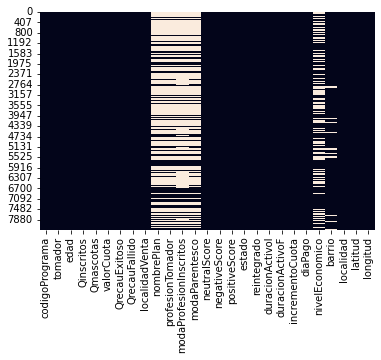

In [154]:
sns.heatmap(data.isnull(), cbar=False)


In [155]:
data[["codigoPrograma", "estado"]].groupby("estado")\
    .count().reset_index().sort_values("codigoPrograma")


,estado,codigoPrograma
1,1,2511
0,0,5645


In [156]:
data.dropna()[["codigoPrograma", "estado"]].groupby("estado")\
    .count().reset_index().sort_values("codigoPrograma")


,estado,codigoPrograma
0,0,753
1,1,1855


Nuestra base de datos contiene gran cantidad de inactivos, siendo casi el 30% solo usuarios activos, los inactivos nos permiten entrenar el modelo sin embargo los datos estaran desbalaceados, los balancearemos en un futuro

In [157]:
data.to_csv("../data/outputs/principal_v0.4.csv", index=False)